# Code Authored by Avik Chakraborty

# Importing the required libraries.

In [1]:
import pandas
import matplotlib.pyplot as mplot
import seaborn
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
import numpy
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
warnings.filterwarnings("ignore")

# About the dataset
##### It is a collection of data showing the sale of a brand car among different customers and their responses. It is a supervised learning data. It is a typical data helpful to understand the behaviour of customers.

In [3]:
dataset = pandas.read_csv('sales data.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,satisfied
0,15624510,Male,19,19000,0,no
1,15810944,Male,35,20000,0,no
2,15668575,Female,26,43000,0,no
3,15603246,Female,27,57000,0,no
4,15804002,Male,19,76000,0,no


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   satisfied        400 non-null    object
dtypes: int64(4), object(2)
memory usage: 18.9+ KB


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Preparing the dataset.

In [6]:
dataset['Satisfied'] = dataset.iloc[:, -1]
dataset = dataset.drop(columns = 'satisfied ', axis = 1)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Satisfied
0,15624510,Male,19,19000,0,no
1,15810944,Male,35,20000,0,no
2,15668575,Female,26,43000,0,no
3,15603246,Female,27,57000,0,no
4,15804002,Male,19,76000,0,no


# Dimensions of the dataset.

In [7]:
dataset.shape

(400, 6)

# Data Cleaning
### Checking for null values and removing them if present.

In [8]:
dataset.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
Satisfied          False
dtype: bool

### Checking for duplicate values and removing them if present.

In [9]:
dataset.duplicated().any()

False

### Checking for outliers.

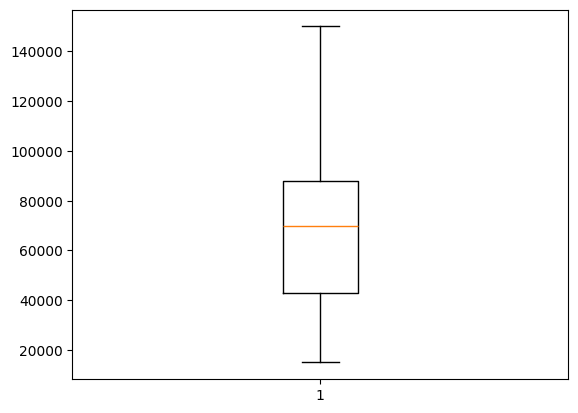

In [10]:
mplot.boxplot(dataset['EstimatedSalary'])
mplot.show()


# Findings :
##### As, we can see that there are no outliers present in the Estimated Salary.

### Checking for abnormal values in the rest of the columns.

In [11]:
for column in dataset.columns:
    if column in ['Purchased', 'Satisfied', 'Gender']:
        print(f'Unique Values in column = {column} are : {dataset[column].unique()}')

Unique Values in column = Gender are : ['Male' 'Female']
Unique Values in column = Purchased are : [0 1]
Unique Values in column = Satisfied are : ['no' 'yes']


In [12]:
# Checking whether there are 400 unique user ids.
print(f'The number of unique user ids are : {len(dataset['User ID'].unique())}')

The number of unique user ids are : 400


##### As we can see that there are no abnormal values present in the dataset. Proceeding further with  the EDA.

# Plotting the Estimated Salary based on the Purchase and Satisfaction of the user.
##### Using Histogram and Bar Graph for this plotting.
##### Histogram : It is used for univariate analysis. It is used to plot the data and check for whether it is normalized or not. It is also used for checking of the distribution of the data of the particular data.
##### Bar Graph : It is used for bivariate analysis. It is used to do plotting based on depending features. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

In [13]:
dataset['EstimatedSalary'].value_counts(sort = 'desc')

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64

In [14]:
tempDF = dataset[dataset['EstimatedSalary'] == 79000].copy()
tempDF.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Satisfied
46,15798850,Male,25,79000,0,no
57,15807481,Male,28,79000,0,no
196,15738448,Female,30,79000,0,yes
235,15646227,Male,46,79000,1,yes
288,15649668,Male,41,79000,0,yes


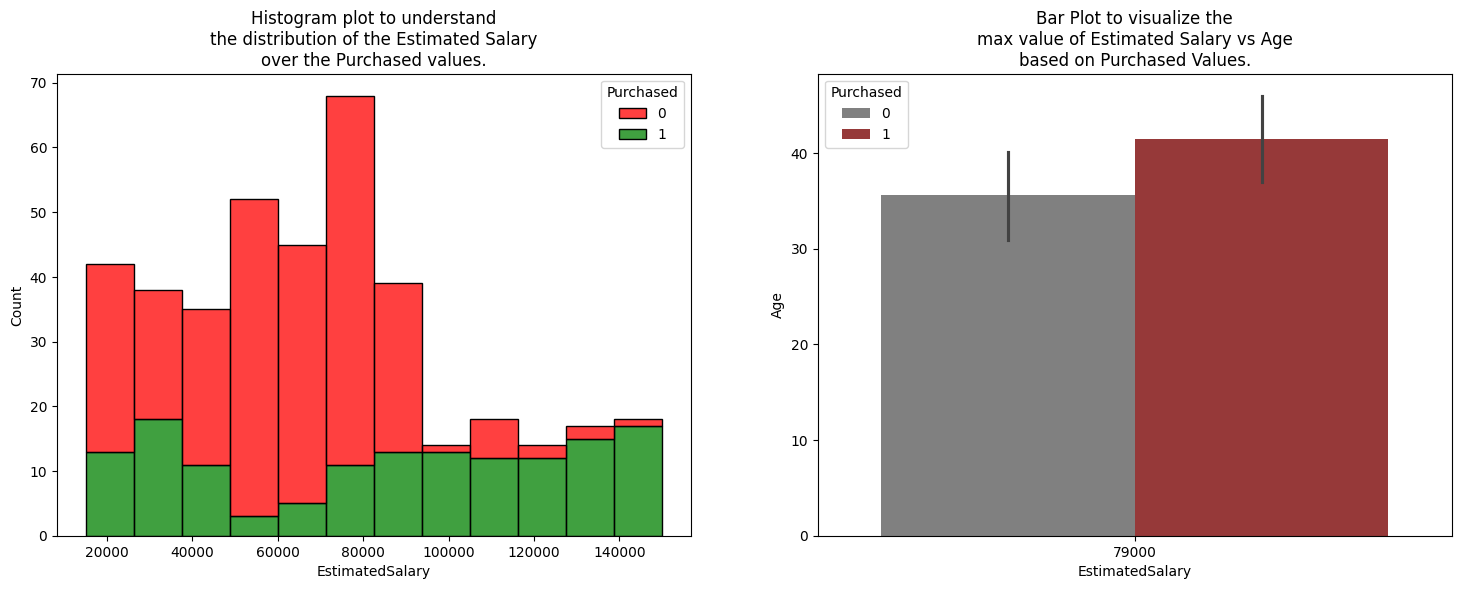

In [15]:
figure, axes = mplot.subplots(1, 2, figsize = (18, 6)) 

# Plotting the histogram
seaborn.histplot(ax = axes[0], data = dataset, x = 'EstimatedSalary', hue = 'Purchased', multiple = 'stack', palette = ['red', 'green'])
axes[0].set_title('Histogram plot to understand\nthe distribution of the Estimated Salary\nover the Purchased values.')

# Bar Plot for visualizing the max value in this dataset
seaborn.barplot(ax = axes[1], data = tempDF, x = 'EstimatedSalary', y = 'Age', hue = 'Purchased',palette = ['Grey', 'Brown'])
axes[1].set_title('Bar Plot to visualize the\nmax value of Estimated Salary vs Age\nbased on Purchased Values.')

mplot.show()

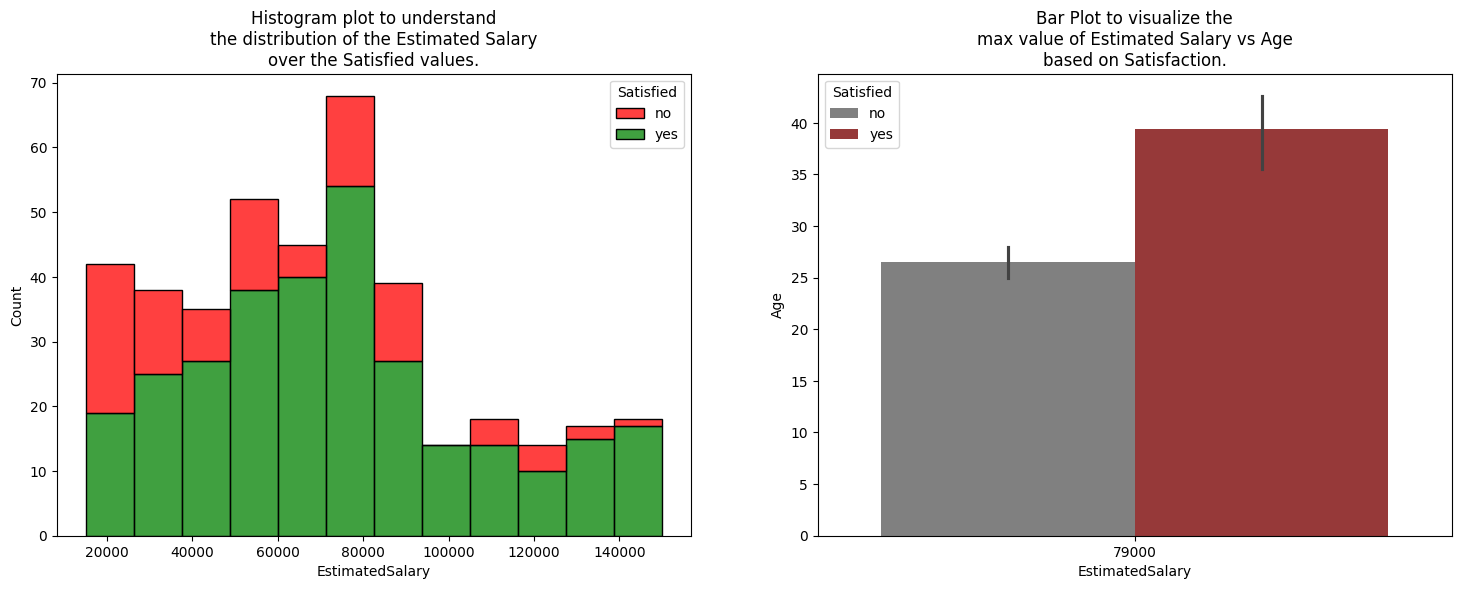

In [16]:
figure, axes = mplot.subplots(1, 2, figsize = (18, 6))

# Plotting the histogram
seaborn.histplot(ax = axes[0], data = dataset, x = 'EstimatedSalary', hue = 'Satisfied', multiple = 'stack', palette = ['red', 'green'])
axes[0].set_title('Histogram plot to understand\nthe distribution of the Estimated Salary\nover the Satisfied values.')

# Bar Plot for visualizing the max value in this dataset
seaborn.barplot(ax = axes[1], data = tempDF, x = 'EstimatedSalary', y = 'Age', hue = 'Satisfied',palette = ['Grey', 'Brown'])
axes[1].set_title('Bar Plot to visualize the\nmax value of Estimated Salary vs Age\nbased on Satisfaction.')

mplot.show()

del tempDF

# Handling the categorical features using Dummy Encoding.
##### 1. Changing the Gender column to a numeric one by assigning classes to different categorical data. Eg: 'male' as 0 and 'female' as 1.
##### 1. Changing the Satisfied column to a numeric one by assigning classes to different categorical data. Eg: 'yes' as 0 and 'no' as 1.

In [17]:
for ind in dataset.index:
    # For Gender Column
    if dataset.loc[ind, 'Gender'] == 'Male':
        dataset.loc[ind, 'Gender'] = 1
    if dataset.loc[ind, 'Gender'] == 'Female':
        dataset.loc[ind, 'Gender'] =0

    # For Satisfied Column
    if dataset.loc[ind, 'Satisfied'] == 'yes':
        dataset.loc[ind, 'Satisfied'] = 1
    if dataset.loc[ind, 'Satisfied'] == 'no':
        dataset.loc[ind, 'Satisfied'] = 0

dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Satisfied
0,15624510,1,19,19000,0,0
1,15810944,1,35,20000,0,0
2,15668575,0,26,43000,0,0
3,15603246,0,27,57000,0,0
4,15804002,1,19,76000,0,0


# Calculating the correlation matrix.
##### A correlation matrix is a matrix that shows the correlated values between two features. It helps to describe the relationship between a dependent feature and independent feature.

In [18]:
correlationMatrix = dataset.corr()
correlationMatrix

,User ID,Gender,Age,EstimatedSalary,Purchased,Satisfied
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120,-0.003077
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469,-0.011549
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454,0.407794
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083,0.209083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000,0.201781
Satisfied,-0.003077,-0.011549,0.407794,0.209083,0.201781,1.000000


# Plotting the Correlation Matrix for better visualization.
##### The plotting is done using a Heat Map by using the seaborn module of python.
##### Seaborn is a module in the python library that is used for advanced data visualization.
##### Heatmap is a visualization technique used in the visualization for the relationship among the features. Each cloured values depict the intensity of the correlation. More intensity of the color more is the correlation whether it is negative or positive.

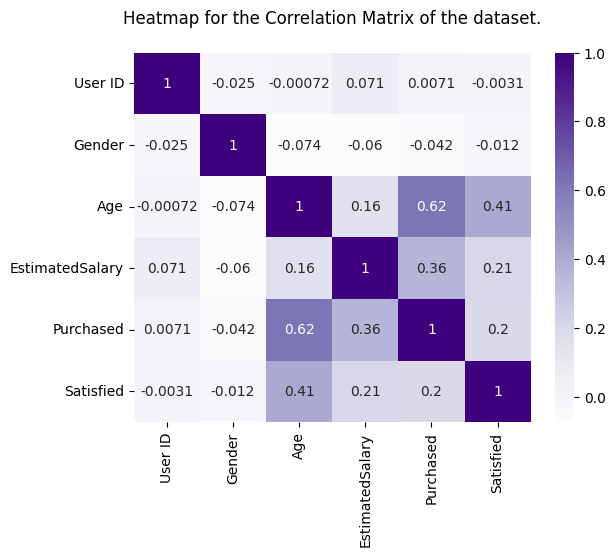

In [19]:
seaborn.heatmap(data = correlationMatrix, cmap = 'Purples', annot = True)
mplot.title('Heatmap for the Correlation Matrix of the dataset.\n')
mplot.show()

# Findings :
##### 1. All the independent features are negatively correlated with the target variable.
##### 2. If the Age increases -> Estimated Salary and Purchase are positively correlated -> therefore the Satisfaction of the user will decrease.
##### 3. If the Age decreases -> Estimated Salary and Purchase are positively correlated -> therefore the Satisfaction of the user will increase.
##### 4. If the Estimated Salary increases -> Satisfaction and Purchase are positively correlated -> therefore the Satifaction of the user will decrease.
##### 5. If the Estimated Salary decreases -> Satisfaction and Purchase are positively correlated -> therefore the Satifaction of the user will increase.

# Pair Plotting of the dataset.
##### This plot shows the distribution and the relationships between the pairs of variables in the dataset.

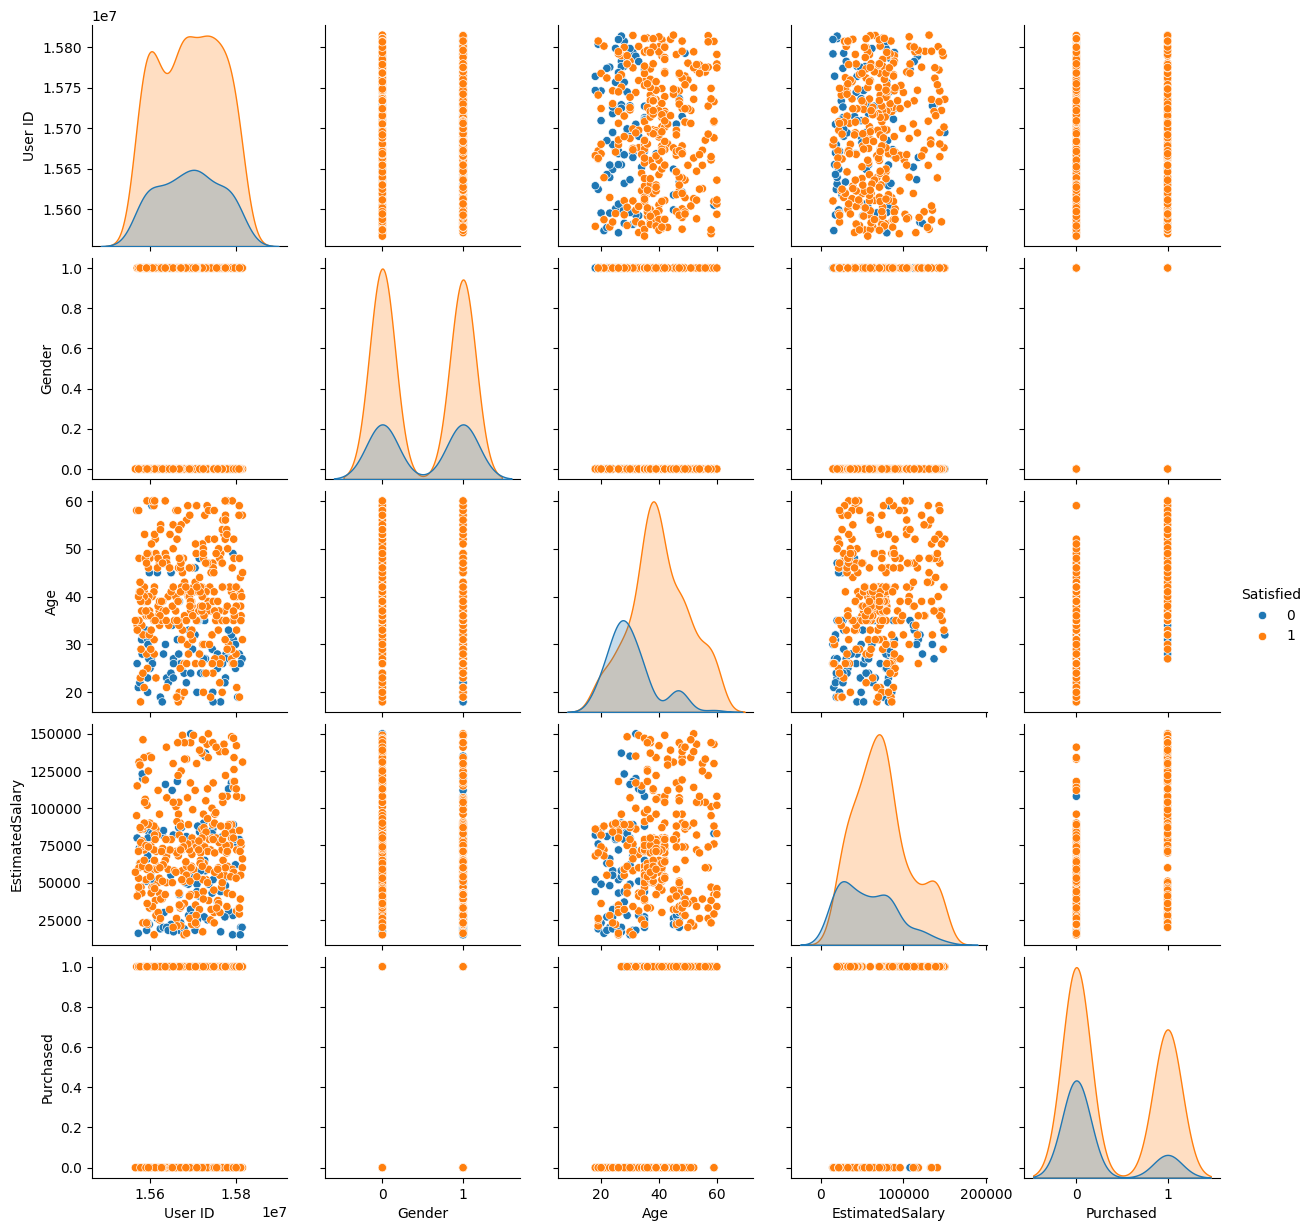

In [20]:
seaborn.pairplot(data = dataset, hue = 'Satisfied')
mplot.show()

# Findings from pair plot : 
##### 1. From the above plot we found out that the people who are 'satisfied' have a higher age, higher salary.
##### 2. People who are satisfied are more than people who are not satisfied.
##### 3. In the plot Age vs Estimated Salary -> The concentration of estimated salary can be seen in between the ages (35-45)
##### 4. A somewhat uniform distribution of values can be seen in the plots purchased vs any other features.
##### 5. The density plot shows us that the people having more Expected Salary are tend to buy more.

# Feature Engineering.
### Normalizing the dataset.
##### Since the difference in the ranges between Age and Estimated Salary is high, therefore performing Normalization.
##### Normalization is a Feature Engineering technique used in scaling down features to a common range [0, 1] or [-1, 1]. This is done before model training.

## Note : To perform normalization we need to split the data into training and testing sets so to prevent any information leak from training to testing and vice-versa.
# Splitting the data into Training and Testing Sets.

In [21]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Satisfied
0,15624510,1,19,19000,0,0
1,15810944,1,35,20000,0,0
2,15668575,0,26,43000,0,0
3,15603246,0,27,57000,0,0
4,15804002,1,19,76000,0,0


In [22]:
inputFeatures = dataset.iloc[:, :-1].copy()
inputFeatures.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [23]:
target = dataset.iloc[:, -1:].copy()
target.head()

,Satisfied
0,0
1,0
2,0
3,0
4,0


In [24]:
xTrain, xTest, yTrain, yTest = train_test_split(inputFeatures, target, test_size = 0.1, random_state = 69)

xTrain.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
77,15774179,0,22,27000,0
176,15609653,0,35,47000,0
166,15762228,0,22,55000,0
230,15794253,0,35,147000,1
201,15708196,1,49,74000,0


In [25]:
yTrain.head()

,Satisfied
77,0
176,1
166,1
230,1
201,1


In [26]:
# Length of the training and testing sets.
print(f'X Train : {xTrain.shape}')
print(f'Y Train : {yTrain.shape}')

print(f'X Train : {xTest.shape}')
print(f'Y Train : {yTest.shape}')

X Train : (360, 5)
Y Train : (360, 1)
X Train : (40, 5)
Y Train : (40, 1)


## Performing Normalization on the training sets.
### Performing Min-Max Scaling.

In [27]:
scaler1 = MinMaxScaler()
xTrainNormalized1 = scaler1.fit_transform(xTrain.iloc[:, 2:4])
xTestNormalized1 = scaler1.fit_transform(xTest.iloc[:, 2:4])

xTrainNormalized1 = pandas.DataFrame(data = xTrainNormalized1, columns = ['Age', 'EstimatedSalary'])
xTrainNormalized1.head()

,Age,EstimatedSalary
0,0.095238,0.088889
1,0.404762,0.237037
2,0.095238,0.296296
3,0.404762,0.977778
4,0.738095,0.437037


In [28]:
xTestNormalized1 = pandas.DataFrame(data = xTestNormalized1, columns = ['Age', 'EstimatedSalary'])
xTestNormalized1.head()

,Age,EstimatedSalary
0,0.657895,0.030303
1,0.421053,0.333333
2,0.710526,0.931818
3,0.105263,0.522727
4,0.684211,0.242424


In [29]:
# Checking for skewness
print('X Train Skewness :')
print(xTrainNormalized1.skew())
print('\nX Test Skewness :')
print(xTestNormalized1.skew())

X Train Skewness :
Age                0.214078
EstimatedSalary    0.481492
dtype: float64

X Test Skewness :
Age                0.387367
EstimatedSalary    0.541638
dtype: float64


### Plotting for Age and Estimated Salary to check for skewness in training set.

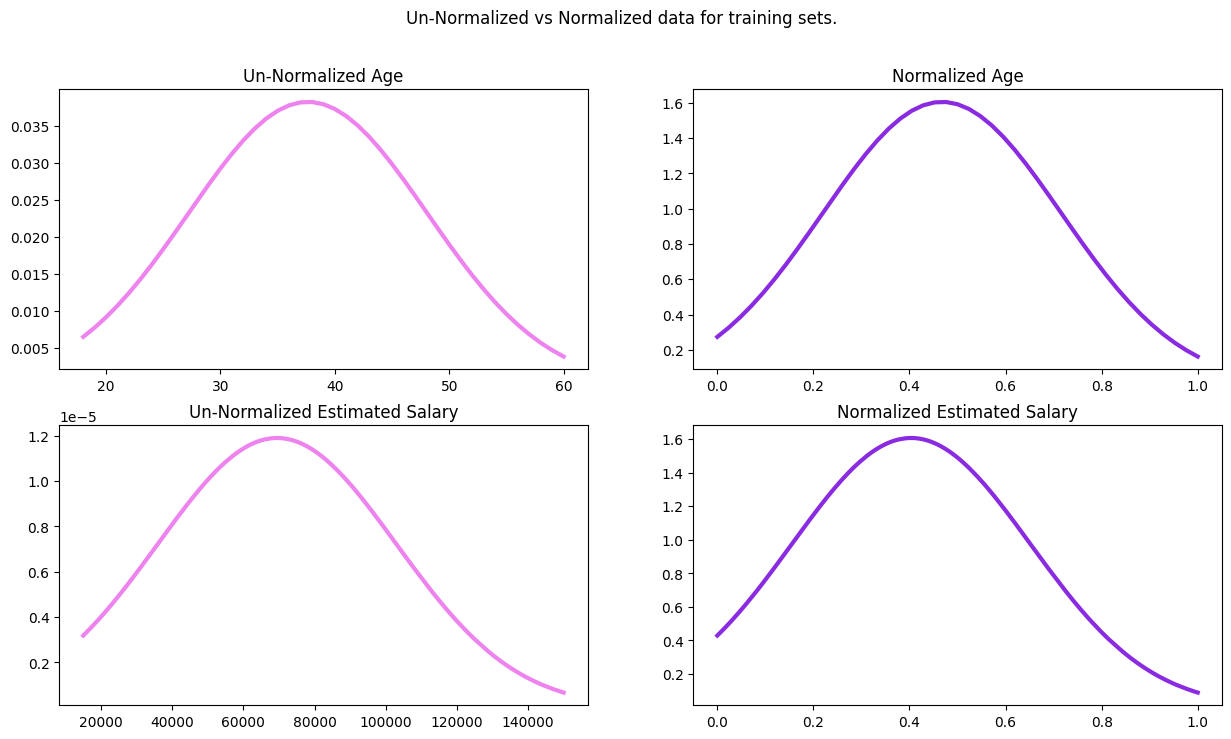

In [30]:
figure, axes = mplot.subplots(2, 2, figsize = (15, 8))

mplot.suptitle('Un-Normalized vs Normalized data for training sets.')

# Finding the PDF for the Un-Normalized dataset.
PDF_UN1 = norm.pdf(xTrain['Age'].sort_values(),  numpy.mean(xTrain['Age']), numpy.std(xTrain['Age']))
PDF_UN2 = norm.pdf(xTrain['EstimatedSalary'].sort_values(),  numpy.mean(xTrain['EstimatedSalary']), numpy.std(xTrain['EstimatedSalary']))

# Finding the PDF for the Normalized dataset.
PDF_N1 = norm.pdf(xTrainNormalized1['Age'].sort_values(),  numpy.mean(xTrainNormalized1['Age']), numpy.std(xTrainNormalized1['Age']))
PDF_N2 = norm.pdf(xTrainNormalized1['EstimatedSalary'].sort_values(),  numpy.mean(xTrainNormalized1['EstimatedSalary']), numpy.std(xTrainNormalized1['EstimatedSalary']))
                
# Plotting the data
# Un-Normalized Age
axes[0][0].plot(xTrain['Age'].sort_values(), PDF_UN1, color = 'violet', linewidth = 3)
axes[0][0].set_title('Un-Normalized Age')
# Normalized Age
axes[0][1].plot(xTrainNormalized1['Age'].sort_values(), PDF_N1, color = 'blueviolet', linewidth = 3)
axes[0][1].set_title('Normalized Age')

# UN-Normalized Estimated Salary
axes[1][0].plot(xTrain['EstimatedSalary'].sort_values(), PDF_UN2, color = 'violet', linewidth = 3)
axes[1][0].set_title('Un-Normalized Estimated Salary')
# Normalized Estimated Salary
axes[1][1].plot(xTrainNormalized1['EstimatedSalary'].sort_values(), PDF_N2, color = 'blueviolet', linewidth = 3)
axes[1][1].set_title('Normalized Estimated Salary')

mplot.show()

### Plotting for Age and Estimated Salary to check for skewness in testing set.

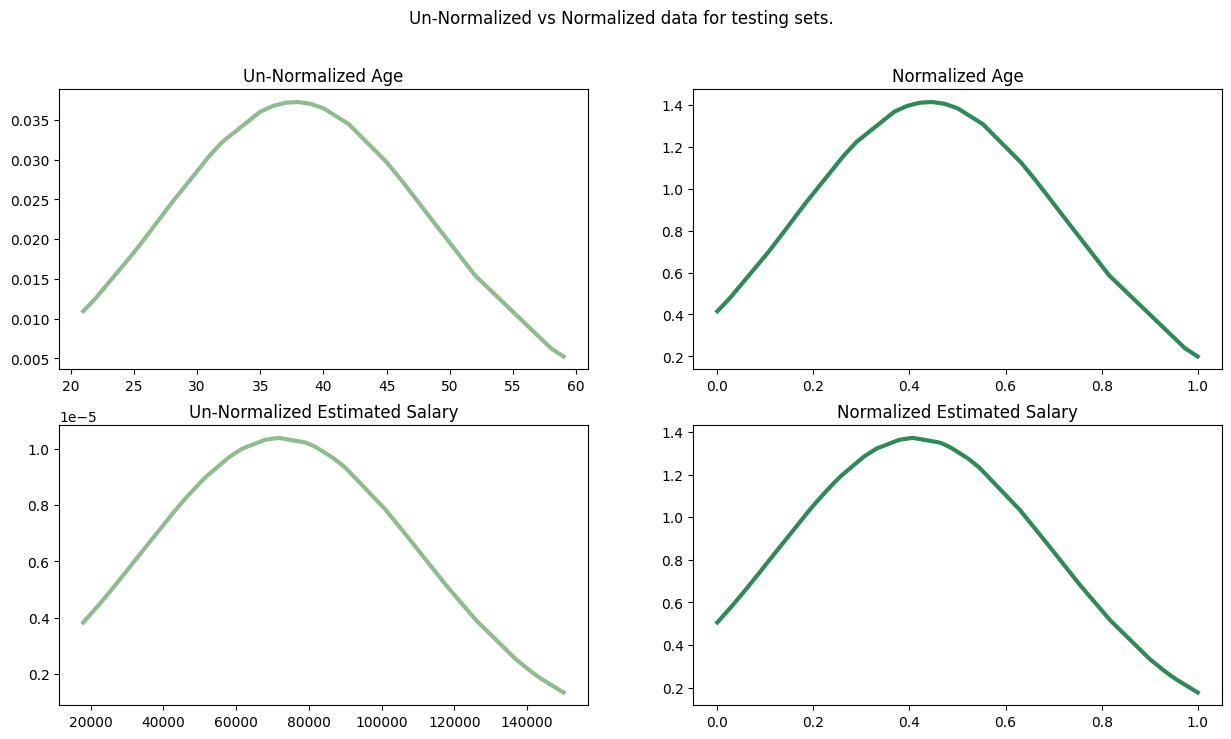

In [31]:
figure, axes = mplot.subplots(2, 2, figsize = (15, 8))

mplot.suptitle('Un-Normalized vs Normalized data for testing sets.')

# Finding the PDF for the Un-Normalized dataset.
PDF_UN1 = norm.pdf(xTest['Age'].sort_values(),  numpy.mean(xTest['Age']), numpy.std(xTest['Age']))
PDF_UN2 = norm.pdf(xTest['EstimatedSalary'].sort_values(),  numpy.mean(xTest['EstimatedSalary']), numpy.std(xTest['EstimatedSalary']))

# Finding the PDF for the Normalized dataset.
PDF_N1 = norm.pdf(xTestNormalized1['Age'].sort_values(),  numpy.mean(xTestNormalized1['Age']), numpy.std(xTestNormalized1['Age']))
PDF_N2 = norm.pdf(xTestNormalized1['EstimatedSalary'].sort_values(),  numpy.mean(xTestNormalized1['EstimatedSalary']), numpy.std(xTestNormalized1['EstimatedSalary']))
                
# Plotting the data
# Un-Normalized Age
axes[0][0].plot(xTest['Age'].sort_values(), PDF_UN1, color = 'darkseagreen', linewidth = 3)
axes[0][0].set_title('Un-Normalized Age')
# Normalized Age
axes[0][1].plot(xTestNormalized1['Age'].sort_values(), PDF_N1, color = 'seagreen', linewidth = 3)
axes[0][1].set_title('Normalized Age')

# UN-Normalized Estimated Salary
axes[1][0].plot(xTest['EstimatedSalary'].sort_values(), PDF_UN2, color = 'darkseagreen', linewidth = 3)
axes[1][0].set_title('Un-Normalized Estimated Salary')
# Normalized Estimated Salary
axes[1][1].plot(xTestNormalized1['EstimatedSalary'].sort_values(), PDF_N2, color = 'seagreen', linewidth = 3)
axes[1][1].set_title('Normalized Estimated Salary')

mplot.show()

# ---------------------------------------------------------------

# Findings :
##### From this plotting we can see that there is skewness present in the training and testing sets after normalizing.
# Reducing the skewness.
### Performing Log Scaling to treat skewness.

In [32]:
scaler2 = FunctionTransformer(func = numpy.log1p)
xTrainNormalized2 = scaler2.fit_transform(xTrain.iloc[:, 2:4])
xTestNormalized2 = scaler2.fit_transform(xTest.iloc[:, 2:4])

xTrainNormalized2 = pandas.DataFrame(data = xTrainNormalized2, columns = ['Age', 'EstimatedSalary'])
xTrainNormalized2.head()


,Age,EstimatedSalary
77,3.135494,10.203629
176,3.583519,10.757924
166,3.135494,10.915107
230,3.583519,11.898195
201,3.912023,11.211834


In [33]:
xTestNormalized2 = pandas.DataFrame(data = xTestNormalized2, columns = ['Age', 'EstimatedSalary'])
xTestNormalized2.head()

,Age,EstimatedSalary
209,3.850148,9.998843
286,3.637586,11.034906
284,3.891820,11.856522
61,3.258097,11.373675
362,3.871201,10.819798


In [34]:
# Checking for skewness
print('X Train Skewness :')
print(xTrainNormalized2.skew())
print('\nX Test Skewness :')
print(xTestNormalized2.skew())

X Train Skewness :
Age               -0.361813
EstimatedSalary   -0.594385
dtype: float64

X Test Skewness :
Age               -0.096050
EstimatedSalary   -0.423966
dtype: float64


### Plotting for Age and Estimated Salary to check for skewness in the training sets.

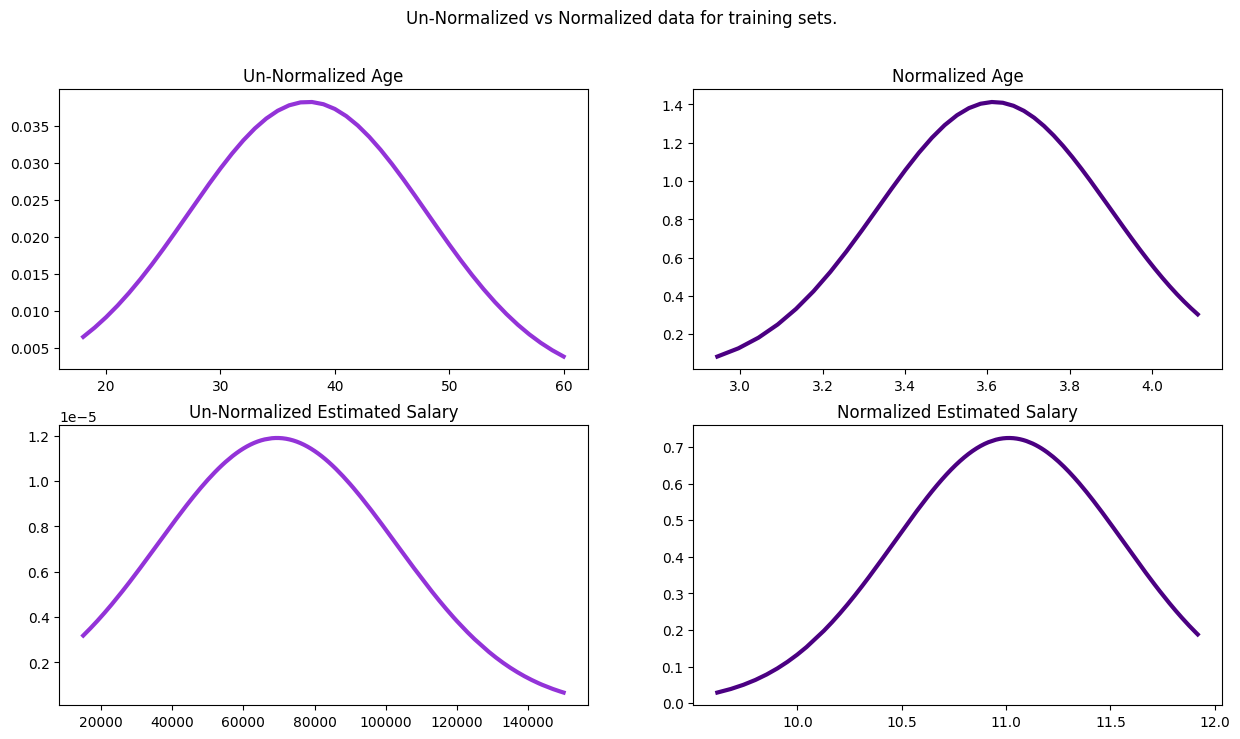

In [35]:
figure, axes = mplot.subplots(2, 2, figsize = (15, 8))

mplot.suptitle('Un-Normalized vs Normalized data for training sets.')

# Finding the PDF for the Un-Normalized dataset.
PDF_UN1 = norm.pdf(xTrain['Age'].sort_values(),  numpy.mean(xTrain['Age']), numpy.std(xTrain['Age']))
PDF_UN2 = norm.pdf(xTrain['EstimatedSalary'].sort_values(),  numpy.mean(xTrain['EstimatedSalary']), numpy.std(xTrain['EstimatedSalary']))

# Finding the PDF for the Normalized dataset.
PDF_N1 = norm.pdf(xTrainNormalized2['Age'].sort_values(),  numpy.mean(xTrainNormalized2['Age']), numpy.std(xTrainNormalized2['Age']))
PDF_N2 = norm.pdf(xTrainNormalized2['EstimatedSalary'].sort_values(),  numpy.mean(xTrainNormalized2['EstimatedSalary']), numpy.std(xTrainNormalized2['EstimatedSalary']))
                
# Plotting the data
# Un-Normalized Age
axes[0][0].plot(xTrain['Age'].sort_values(), PDF_UN1, color = '#9333d8', linewidth = 3)
axes[0][0].set_title('Un-Normalized Age')
# Normalized Age
axes[0][1].plot(xTrainNormalized2['Age'].sort_values(), PDF_N1, color = 'indigo', linewidth = 3)
axes[0][1].set_title('Normalized Age')

# UN-Normalized Estimated Salary
axes[1][0].plot(xTrain['EstimatedSalary'].sort_values(), PDF_UN2, color = '#9333d8', linewidth = 3)
axes[1][0].set_title('Un-Normalized Estimated Salary')
# Normalized Estimated Salary
axes[1][1].plot(xTrainNormalized2['EstimatedSalary'].sort_values(), PDF_N2, color = 'indigo', linewidth = 3)
axes[1][1].set_title('Normalized Estimated Salary')

mplot.show()

### Plotting for Age and Estimated Salary to check for skewness in the testing sets.

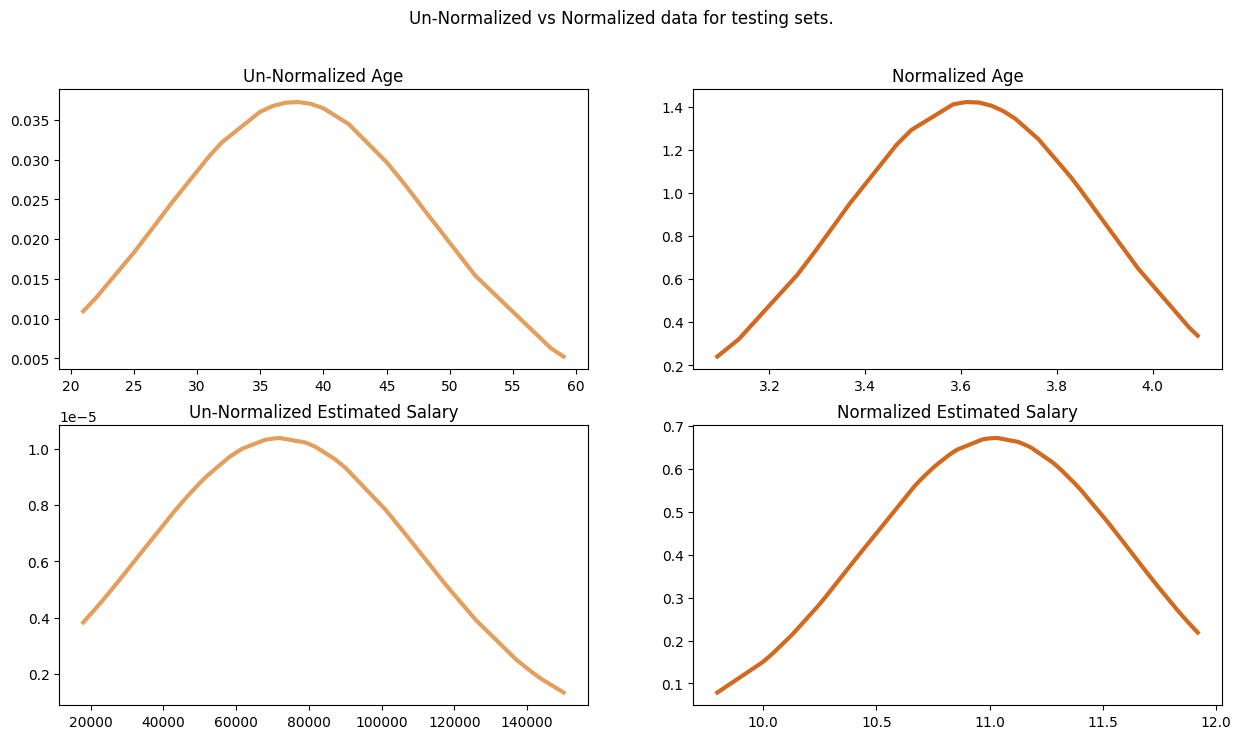

In [36]:
figure, axes = mplot.subplots(2, 2, figsize = (15, 8))

mplot.suptitle('Un-Normalized vs Normalized data for testing sets.')

# Finding the PDF for the Un-Normalized dataset.
PDF_UN1 = norm.pdf(xTest['Age'].sort_values(),  numpy.mean(xTest['Age']), numpy.std(xTest['Age']))
PDF_UN2 = norm.pdf(xTest['EstimatedSalary'].sort_values(),  numpy.mean(xTest['EstimatedSalary']), numpy.std(xTest['EstimatedSalary']))

# Finding the PDF for the Normalized dataset.
PDF_N1 = norm.pdf(xTestNormalized2['Age'].sort_values(),  numpy.mean(xTestNormalized2['Age']), numpy.std(xTestNormalized2['Age']))
PDF_N2 = norm.pdf(xTestNormalized2['EstimatedSalary'].sort_values(),  numpy.mean(xTestNormalized2['EstimatedSalary']), numpy.std(xTestNormalized2['EstimatedSalary']))
                
# Plotting the data
# Un-Normalized Age
axes[0][0].plot(xTest['Age'].sort_values(), PDF_UN1, color = '#e29f5d', linewidth = 3)
axes[0][0].set_title('Un-Normalized Age')
# Normalized Age
axes[0][1].plot(xTestNormalized2['Age'].sort_values(), PDF_N1, color = 'chocolate', linewidth = 3)
axes[0][1].set_title('Normalized Age')

# UN-Normalized Estimated Salary
axes[1][0].plot(xTest['EstimatedSalary'].sort_values(), PDF_UN2, color = '#e29f5d', linewidth = 3)
axes[1][0].set_title('Un-Normalized Estimated Salary')
# Normalized Estimated Salary
axes[1][1].plot(xTestNormalized2['EstimatedSalary'].sort_values(), PDF_N2, color = 'chocolate', linewidth = 3)
axes[1][1].set_title('Normalized Estimated Salary')

mplot.show()

### Findings :
##### Skewness is not reduced and the distribution is now negatively skewed.

### Performing Square Root Transformation to treat skewness.

In [37]:
scaler3 = FunctionTransformer(func = numpy.sqrt)
xTrainNormalized3 = scaler3.fit_transform(xTrain.iloc[:, 2:4])
xTestNormalized3 = scaler3.fit_transform(xTest.iloc[:, 2:4])

xTrainNormalized3 = pandas.DataFrame(data = xTrainNormalized3, columns = ['Age', 'EstimatedSalary'])
xTrainNormalized3.head()

,Age,EstimatedSalary
77,4.690416,164.316767
176,5.916080,216.794834
166,4.690416,234.520788
230,5.916080,383.405790
201,7.000000,272.029410


In [38]:
xTestNormalized3 = pandas.DataFrame(data = xTestNormalized3, columns = ['Age', 'EstimatedSalary'])
xTestNormalized3.head()

,Age,EstimatedSalary
209,6.782330,148.323970
286,6.082763,248.997992
284,6.928203,375.499667
61,5.000000,294.957624
362,6.855655,223.606798


In [39]:
# Checking for skewness
print('X Train Skewness :')
print(xTrainNormalized3.skew())
print('\nX Test Skewness :')
print(xTestNormalized3.skew())

X Train Skewness :
Age               -0.075838
EstimatedSalary   -0.039712
dtype: float64

X Test Skewness :
Age                0.140495
EstimatedSalary    0.092397
dtype: float64


### Plotting for Age and Estimated Salary to check for skewness in the training sets.

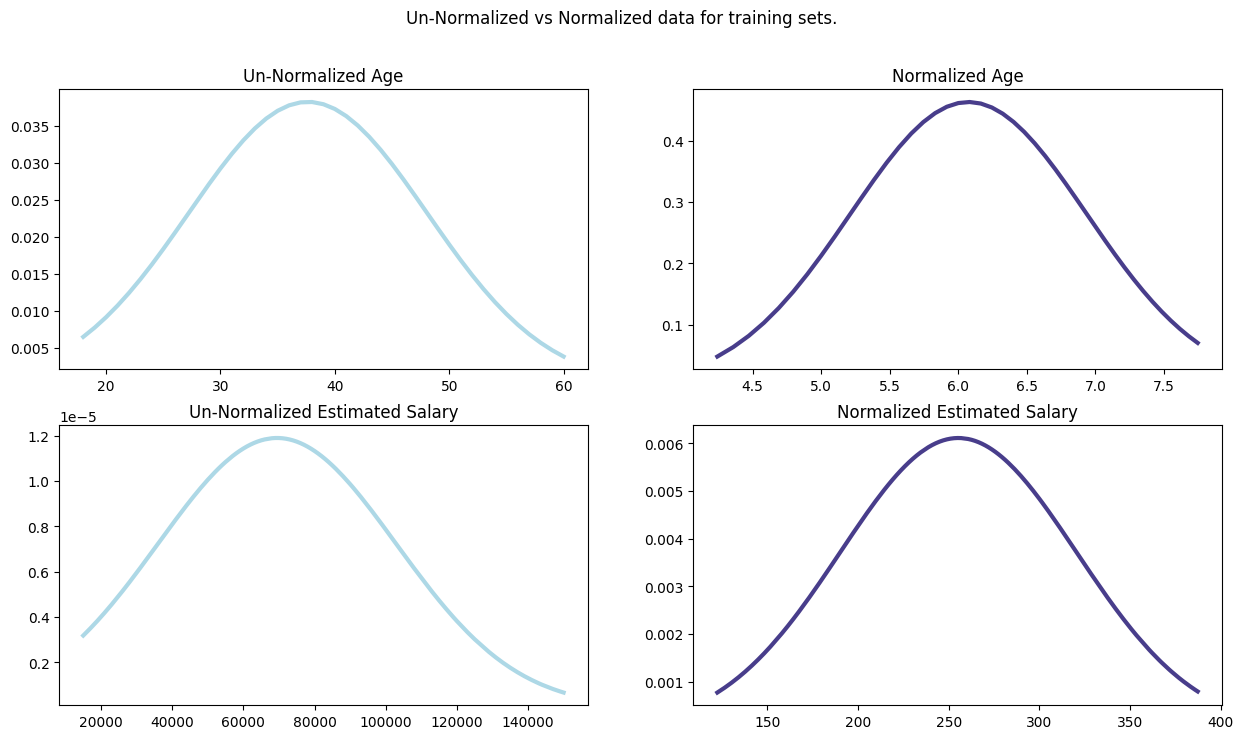

In [40]:
figure, axes = mplot.subplots(2, 2, figsize = (15, 8))

mplot.suptitle('Un-Normalized vs Normalized data for training sets.')

# Finding the PDF for the Un-Normalized dataset.
PDF_UN1 = norm.pdf(xTrain['Age'].sort_values(),  numpy.mean(xTrain['Age']), numpy.std(xTrain['Age']))
PDF_UN2 = norm.pdf(xTrain['EstimatedSalary'].sort_values(),  numpy.mean(xTrain['EstimatedSalary']), numpy.std(xTrain['EstimatedSalary']))

# Finding the PDF for the Normalized dataset.
PDF_N1 = norm.pdf(xTrainNormalized3['Age'].sort_values(),  numpy.mean(xTrainNormalized3['Age']), numpy.std(xTrainNormalized3['Age']))
PDF_N2 = norm.pdf(xTrainNormalized3['EstimatedSalary'].sort_values(),  numpy.mean(xTrainNormalized3['EstimatedSalary']), numpy.std(xTrainNormalized3['EstimatedSalary']))
                
# Plotting the data
# Un-Normalized Age
axes[0][0].plot(xTrain['Age'].sort_values(), PDF_UN1, color = 'lightblue', linewidth = 3)
axes[0][0].set_title('Un-Normalized Age')
# Normalized Age
axes[0][1].plot(xTrainNormalized3['Age'].sort_values(), PDF_N1, color = 'darkslateblue', linewidth = 3)
axes[0][1].set_title('Normalized Age')

# UN-Normalized Estimated Salary
axes[1][0].plot(xTrain['EstimatedSalary'].sort_values(), PDF_UN2, color = 'lightblue', linewidth = 3)
axes[1][0].set_title('Un-Normalized Estimated Salary')
# Normalized Estimated Salary
axes[1][1].plot(xTrainNormalized3['EstimatedSalary'].sort_values(), PDF_N2, color = 'darkslateblue', linewidth = 3)
axes[1][1].set_title('Normalized Estimated Salary')

mplot.show()

### Plotting for Age and Estimated Salary to check for skewness in testing set.

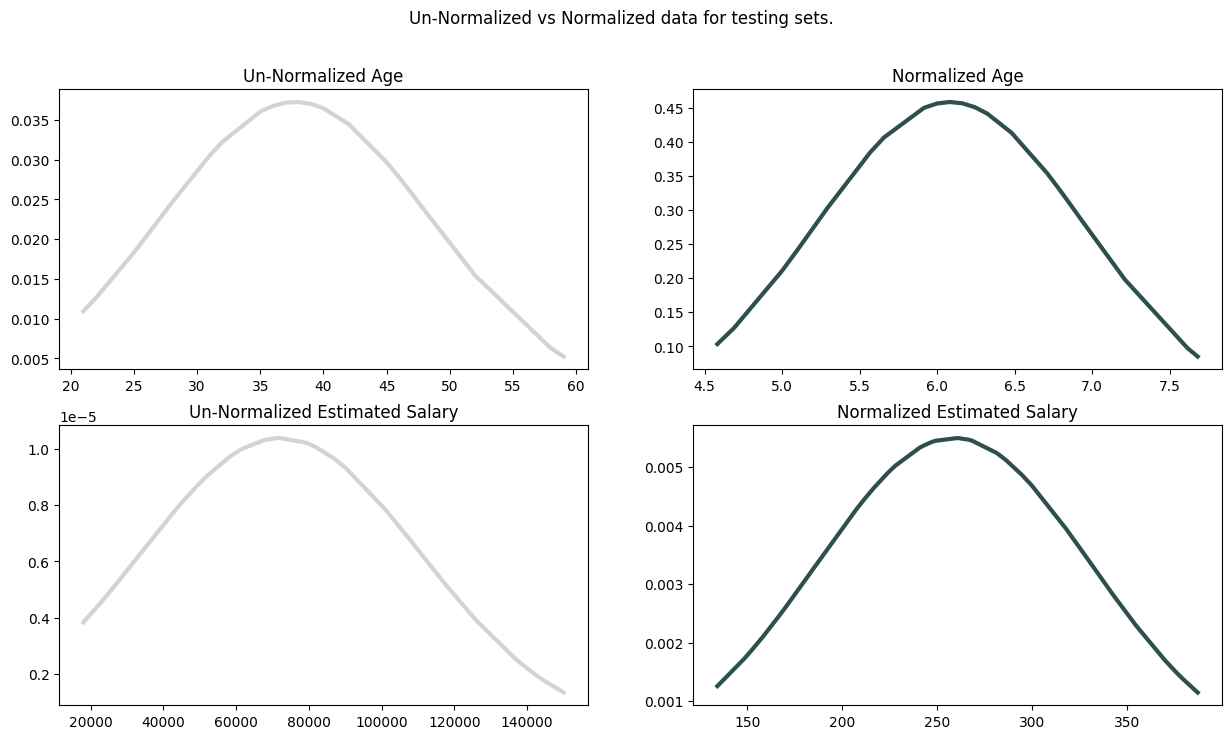

In [41]:
figure, axes = mplot.subplots(2, 2, figsize = (15, 8))

mplot.suptitle('Un-Normalized vs Normalized data for testing sets.')

# Finding the PDF for the Un-Normalized dataset.
PDF_UN1 = norm.pdf(xTest['Age'].sort_values(),  numpy.mean(xTest['Age']), numpy.std(xTest['Age']))
PDF_UN2 = norm.pdf(xTest['EstimatedSalary'].sort_values(),  numpy.mean(xTest['EstimatedSalary']), numpy.std(xTest['EstimatedSalary']))

# Finding the PDF for the Normalized dataset.
PDF_N1 = norm.pdf(xTestNormalized3['Age'].sort_values(),  numpy.mean(xTestNormalized3['Age']), numpy.std(xTestNormalized3['Age']))
PDF_N2 = norm.pdf(xTestNormalized3['EstimatedSalary'].sort_values(),  numpy.mean(xTestNormalized3['EstimatedSalary']), numpy.std(xTestNormalized3['EstimatedSalary']))
                
# Plotting the data
# Un-Normalized Age
axes[0][0].plot(xTest['Age'].sort_values(), PDF_UN1, color = 'lightgrey', linewidth = 3)
axes[0][0].set_title('Un-Normalized Age')
# Normalized Age
axes[0][1].plot(xTestNormalized3['Age'].sort_values(), PDF_N1, color = 'darkslategrey', linewidth = 3)
axes[0][1].set_title('Normalized Age')

# UN-Normalized Estimated Salary
axes[1][0].plot(xTest['EstimatedSalary'].sort_values(), PDF_UN2, color = 'lightgrey', linewidth = 3)
axes[1][0].set_title('Un-Normalized Estimated Salary')
# Normalized Estimated Salary
axes[1][1].plot(xTestNormalized3['EstimatedSalary'].sort_values(), PDF_N2, color = 'darkslategrey', linewidth = 3)
axes[1][1].set_title('Normalized Estimated Salary')

mplot.show()

# Findings :
##### 1. As, we can see that the skewness is reduced.
##### 2. Choosing this normalization technique and moving forward to the model preparation.

# Model Preparation.
##### Since this is a Classification problem we need to use a Classification Model to categorize the data points. In this problem KNN Algorithm is used.

### KNN :
##### KNN is a supervised learning algorithm. It is does not make any underlying assumptions about the distribution of data . It classifies data point, which classifies coordinates into groups identified by an attribute.
##### The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors.
##### It is used in finding intense application in pattern recognition, data mining, and intrusion detection.

## Forming the new dataset with the normalized values.

In [42]:
xTrain = pandas.concat([xTrain.iloc[:, 0:2], xTrainNormalized3, xTrain.iloc[:, -1:], yTrain], axis = 1)
xTrain.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Satisfied
77,15774179,0,4.690416,164.316767,0,0
176,15609653,0,5.916080,216.794834,0,1
166,15762228,0,4.690416,234.520788,0,1
230,15794253,0,5.916080,383.405790,1,1
201,15708196,1,7.000000,272.029410,0,1


In [43]:
xTest = pandas.concat([xTest.iloc[:, 0:2], xTestNormalized3, xTest.iloc[:, -1:], yTest], axis = 1)
xTest.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Satisfied
209,15697424,0,6.782330,148.323970,0,1
286,15631070,0,6.082763,248.997992,0,1
284,15638646,1,6.928203,375.499667,0,1
61,15673619,1,5.000000,294.957624,0,0
362,15768072,0,6.855655,223.606798,1,1


In [44]:
newDataset = pandas.concat([xTrain, xTest], axis = 0, ignore_index = True)
newDataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Satisfied
0,15774179,0,4.690416,164.316767,0,0
1,15609653,0,5.916080,216.794834,0,1
2,15762228,0,4.690416,234.520788,0,1
3,15794253,0,5.916080,383.405790,1,1
4,15708196,1,7.000000,272.029410,0,1


In [45]:
newDataset.shape

(400, 6)

### Dropping the User ID column because indexation is already present.

In [46]:
newDataset = newDataset.drop(columns = ['User ID'], axis = 1)
newDataset.head()

,Gender,Age,EstimatedSalary,Purchased,Satisfied
0,0,4.690416,164.316767,0,0
1,0,5.916080,216.794834,0,1
2,0,4.690416,234.520788,0,1
3,0,5.916080,383.405790,1,1
4,1,7.000000,272.029410,0,1


# Procedure :
##### Splitting the dataset into Training and Testing Sets.
##### New shuffeled datasets are created along with the random_state value which ranges from [1-100]
##### With each split from each shuffle the k values are passed to the model.
##### The split with the highest accuracy i.e. produced by the K-Value is taken as the final split with its random_state.

In [47]:
newDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
 4   Satisfied        400 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 15.8+ KB


### Changing the data type of the Gender and Satisfied class to int.

In [48]:
newDataset['Gender'] = newDataset['Gender'].astype('int64')
newDataset['Satisfied'] = newDataset['Satisfied'].astype('int64')

In [49]:
newDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    int64  
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
 4   Satisfied        400 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.8 KB


In [50]:
newDataset.head()

,Gender,Age,EstimatedSalary,Purchased,Satisfied
0,0,4.690416,164.316767,0,0
1,0,5.916080,216.794834,0,1
2,0,4.690416,234.520788,0,1
3,0,5.916080,383.405790,1,1
4,1,7.000000,272.029410,0,1


In [51]:
inputFeatures = newDataset.iloc[:, :-1]
inputFeatures.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,4.690416,164.316767,0
1,0,5.916080,216.794834,0
2,0,4.690416,234.520788,0
3,0,5.916080,383.405790,1
4,1,7.000000,272.029410,0


In [52]:
target = newDataset.iloc[:, -1:]
target.head()

,Satisfied
0,0
1,1
2,1
3,1
4,1


# Creating a dictionary so as to keep a note of which random_state produces the best split which in turn produces the best classification.
# Structure of dictionary:
##### accuracy = {random_state value : {k_value : value, accuracy : value}}

In [53]:
accuracy = {}

##### Normalizing the dataset to scale it down to similar range.

In [54]:
scaler4 = MinMaxScaler()

In [55]:
def normalize(xTrain, xTest):
    norm1 = scaler4.fit_transform(xTrain.iloc[:, 1:3])
    norm2 = scaler4.fit_transform(xTest.iloc[:, 1:3])

    norm1 = pandas.DataFrame(data = norm1, columns = ['Age', 'EstimatedSalary'])
    norm2 = pandas.DataFrame(data = norm2, columns = ['Age', 'EstimatedSalary'])

    xTrain['Age'] =norm1['Age'].values
    xTrain['EstimatedSalary'] = norm1['EstimatedSalary'].values

    xTest['Age'] =norm2['Age'].values
    xTest['EstimatedSalary'] = norm2['EstimatedSalary'].values

    del norm1, norm2

    return xTrain, xTest

##### Performing the KNN Classification for each split and calculating their accuracy score. Then selecting the K Value for the highest accuracy value.

In [56]:
# Performing the KNN classification.
def performing_KNN_Classification(xTrain, xTest, yTrain, yTest):
    highAccuracy = 0
    kValue = -1
    
    for k_value in range(3, 52, 2):
        model = KNeighborsClassifier(n_neighbors = k_value)
        model.fit(xTrain, yTrain)
        yPredict = model.predict(xTest)

        accuracyPerKValue = accuracy_score(yTest, yPredict)

        if accuracyPerKValue > highAccuracy:
            highAccuracy = accuracyPerKValue
            kValue = k_value

    
    return kValue, highAccuracy

In [57]:
for rs in range(1, 101, 1):
    flag = 0

    xTrain, xTest, yTrain, yTest = train_test_split(inputFeatures, target, test_size = 0.2, random_state = rs)

    xTrain, xTest = normalize(xTrain, xTest)

    kValue, highAccuracy = performing_KNN_Classification(xTrain, xTest, yTrain, yTest)

    state_to_delete = -1

    # Updating the accuracy dictionary
    if len(accuracy) != 0:
        for state in accuracy.keys():
            if kValue == accuracy[state] ['k_value']:
                flag = 1
                if highAccuracy > accuracy[state]['accuracy']:
                    state_to_delete = state
                    break

        if flag == 1 and state_to_delete != -1:
            accuracy.pop(state_to_delete)
            accuracy.update({ rs : { 'k_value' : kValue,  'accuracy' : highAccuracy } })

        if flag == 0:
            accuracy.update({ rs : { 'k_value' : kValue,  'accuracy' : highAccuracy } })

    else:
        accuracy.update({ rs : { 'k_value' : kValue,  'accuracy' : highAccuracy } })

print('Model preparation done !')


Model preparation done !


In [58]:
accuracy

{1: {'k_value': 31, 'accuracy': 0.8375},
 2: {'k_value': 29, 'accuracy': 0.8625},
 4: {'k_value': 37, 'accuracy': 0.8},
 12: {'k_value': 15, 'accuracy': 0.8375},
 15: {'k_value': 11, 'accuracy': 0.875},
 16: {'k_value': 7, 'accuracy': 0.8625},
 17: {'k_value': 27, 'accuracy': 0.875},
 20: {'k_value': 41, 'accuracy': 0.8},
 21: {'k_value': 23, 'accuracy': 0.8125},
 24: {'k_value': 19, 'accuracy': 0.875},
 29: {'k_value': 39, 'accuracy': 0.8375},
 35: {'k_value': 43, 'accuracy': 0.8},
 41: {'k_value': 21, 'accuracy': 0.825},
 43: {'k_value': 5, 'accuracy': 0.875},
 49: {'k_value': 33, 'accuracy': 0.9},
 53: {'k_value': 9, 'accuracy': 0.8375},
 62: {'k_value': 13, 'accuracy': 0.775},
 69: {'k_value': 35, 'accuracy': 0.775},
 72: {'k_value': 47, 'accuracy': 0.775},
 74: {'k_value': 25, 'accuracy': 0.8625},
 86: {'k_value': 17, 'accuracy': 0.8125},
 100: {'k_value': 3, 'accuracy': 0.8875}}

# Plotting the K-Values with their Accuracy.

In [59]:
kValue = []
accuracyPerKvalue = []

for key in accuracy:
    kValue.append(accuracy[key]['k_value'])
    accuracyPerKvalue.append(accuracy[key]['accuracy'])

tempDF = {'K Value' : kValue, 'Highest Accuracy' : accuracyPerKvalue}
tempDF = pandas.DataFrame(tempDF)
tempDF.head()

,K Value,Highest Accuracy
0,31,0.8375
1,29,0.8625
2,37,0.8000
3,15,0.8375
4,11,0.8750


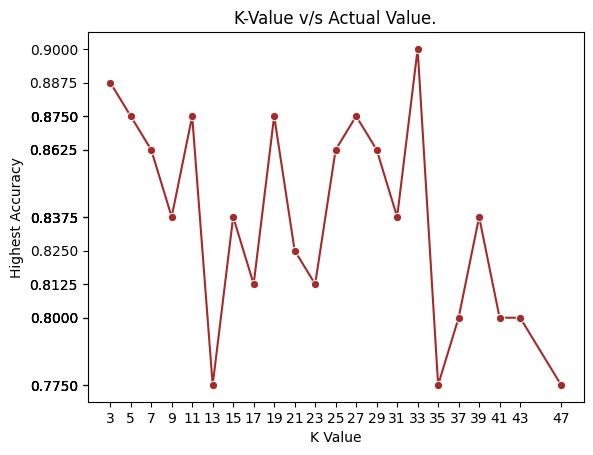

In [60]:
seaborn.lineplot(data = tempDF, x = 'K Value', y = 'Highest Accuracy', marker = 'o', color = 'brown')
mplot.xticks(tempDF['K Value'])
mplot.yticks(tempDF['Highest Accuracy'])
mplot.title('K-Value v/s Actual Value.')
mplot.show()

del tempDF # Deleting the temporary Data Frame

# Findings :
##### 1. The value 33 gives us the best result.
##### 2. Choosing 33 as the optimal K-Value.


# Finding the optimal K-Value for KNN.

In [61]:
highestAccuracy = 0
kValue = 0
state = 0

for key in accuracy:
    if accuracy[key]['accuracy'] > highestAccuracy:
        highestAccuracy = accuracy[key]['accuracy']
        kValue = accuracy[key]['k_value']
        state = key

print(f'The Random State : {state}')
print(f'The Optimal K-Value : {kValue}')
print(f'The Highest Accuracy : {highestAccuracy}')

The Random State : 49
The Optimal K-Value : 33
The Highest Accuracy : 0.9


# Final Optimal Model.

In [62]:
xTrain, xTest, yTrain, yTest = train_test_split(inputFeatures, target, test_size = 0.2, random_state = state)

### Normalizing the final model.

In [63]:
scaler = MinMaxScaler()

norm1 = scaler4.fit_transform(xTrain.iloc[:, 1:3])
norm2 = scaler4.fit_transform(xTest.iloc[:, 1:3])

norm1 = pandas.DataFrame(data = norm1, columns = ['Age', 'EstimatedSalary'])
norm2 = pandas.DataFrame(data = norm2, columns = ['Age', 'EstimatedSalary'])

xTrain['Age'] =norm1['Age'].values
xTrain['EstimatedSalary'] = norm1['EstimatedSalary'].values

xTest['Age'] =norm2['Age'].values
xTest['EstimatedSalary'] = norm2['EstimatedSalary'].values

del norm1, norm2

xTrain.head()

,Gender,Age,EstimatedSalary,Purchased
299,0,0.453372,0.550757,0
192,0,0.944015,0.856458,1
1,0,0.477672,0.356163,0
318,1,1.000000,0.311394,1
293,1,0.571559,0.856458,1


In [64]:
xTest.head()

,Gender,Age,EstimatedSalary,Purchased
117,1,0.558898,0.472458,0
302,1,0.781026,0.567505,1
232,1,0.511082,0.876858,1
149,0,0.535152,0.939779,1
202,0,0.628321,0.553460,0


In [65]:
model = KNeighborsClassifier(n_neighbors = kValue)
model.fit(xTrain, yTrain)
yPredict = model.predict(xTest)

# Printing the Classification report for the Optimal Model.

In [66]:
print(classification_report(y_true = yTest, y_pred = yPredict))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.97      0.91      0.94        69

    accuracy                           0.90        80
   macro avg       0.78      0.87      0.82        80
weighted avg       0.92      0.90      0.91        80



# Printing the accuracy score.

In [67]:
accuracy_score(yTest, yPredict)

0.9

# Plotting the Confusion matrix.

In [68]:
confMatrix = confusion_matrix(yTest, yPredict)
print(confMatrix)

[[ 9  2]
 [ 6 63]]


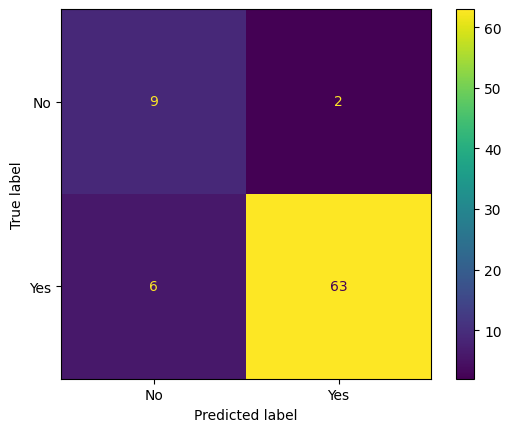

In [69]:
ConfusionMatrixDisplay(confusion_matrix = confMatrix, display_labels = ['No', 'Yes']).plot()
mplot.show()

# Using Cross-validation Method.

In [116]:
crossValScore = {}

In [117]:
for k_value in range (3, 52, 2):
    knn = KNeighborsClassifier(n_neighbors = k_value)
    
    highScore = 0
    cv_fold = 0

    for folds in range(2, 52):
        score = cross_val_score(knn, inputFeatures, target, cv = folds, scoring = 'accuracy')
        score = sum(score) / len(score)

        if score > highScore:
            highScore = score
            cv_fold = folds

    crossValScore.update({k_value : {
                                        'folds_no' : cv_fold,
                                        'score' : highScore
                                    }
                        })
                        
print('Cross Validation Performed !')

Cross Validation Performed !


In [118]:
crossValScore

{3: {'folds_no': 16, 'score': 0.7625000000000001},
 5: {'folds_no': 20, 'score': 0.77},
 7: {'folds_no': 75, 'score': 0.7711111111111106},
 9: {'folds_no': 4, 'score': 0.77},
 11: {'folds_no': 7, 'score': 0.7775041050903119},
 13: {'folds_no': 3, 'score': 0.7775408670931059},
 15: {'folds_no': 12, 'score': 0.780377302436126},
 17: {'folds_no': 14, 'score': 0.7799964813511611},
 19: {'folds_no': 19, 'score': 0.7800182273866485},
 21: {'folds_no': 14, 'score': 0.7775334271639689},
 23: {'folds_no': 12, 'score': 0.7754010695187167},
 25: {'folds_no': 13, 'score': 0.7750206782464849},
 27: {'folds_no': 3, 'score': 0.7724909288145737},
 29: {'folds_no': 7, 'score': 0.7724915737619912},
 31: {'folds_no': 3, 'score': 0.7699846631504133},
 33: {'folds_no': 3, 'score': 0.7674783974862529},
 35: {'folds_no': 3, 'score': 0.7674783974862529},
 37: {'folds_no': 75, 'score': 0.7684444444444437},
 39: {'folds_no': 18, 'score': 0.7676767676767675},
 41: {'folds_no': 56, 'score': 0.7678571428571426},
 

# Plotting the Cross Validation Outcome.

In [85]:
from mpl_toolkits import mplot3d

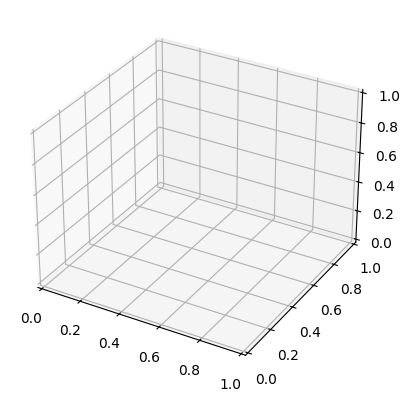

In [103]:
figure = mplot.figure()
axes = mplot.axes(projection = '3d')

In [104]:
kvalues = list(crossValScore.keys())
print(f'All the K Values : {kvalues}')

All the K Values : [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]


In [109]:
kfolds = []
scores = []
for k_value in crossValScore.keys():
    kfolds.append(crossValScore[k_value]['folds_no'])
    scores.append(crossValScore[k_value]['score'])

# kfolds = set(kfolds)
# scores = set(scores)

print(f'All the number of K folds : {kfolds}')
print(f'All the accuracy scores : {scores}')

All the number of K folds : [16, 20, 20, 4, 7, 3, 12, 14, 19, 14, 12, 13, 3, 7, 3, 3, 3, 18, 18, 6, 6, 6, 4, 23, 6]
All the accuracy scores : [0.7625000000000001, 0.77, 0.7700000000000001, 0.77, 0.7775041050903119, 0.7775408670931059, 0.780377302436126, 0.7799964813511611, 0.7800182273866485, 0.7775334271639689, 0.7754010695187167, 0.7750206782464849, 0.7724909288145737, 0.7724915737619912, 0.7699846631504133, 0.7674783974862529, 0.7674783974862529, 0.7676767676767675, 0.7676767676767675, 0.7675260063319764, 0.7675260063319764, 0.7675260063319764, 0.7725, 0.765274225632282, 0.7675260063319764]


In [110]:
axes.plot3D(kvalues, kfolds, scores, 'red')
axes.set_title('K Values vs K Fold no. vs Accuracy')
mplot.show()

# Findings : This model gives us an accuracy of 0.9 or 90%.
# Plotting for the Optimal Model.

In [74]:
tempDF = {'Actual Values' : yTest['Satisfied'].values, 'Predicted Values' : yPredict}
tempDF = pandas.DataFrame(tempDF)
tempDF.head()

,Actual Values,Predicted Values
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


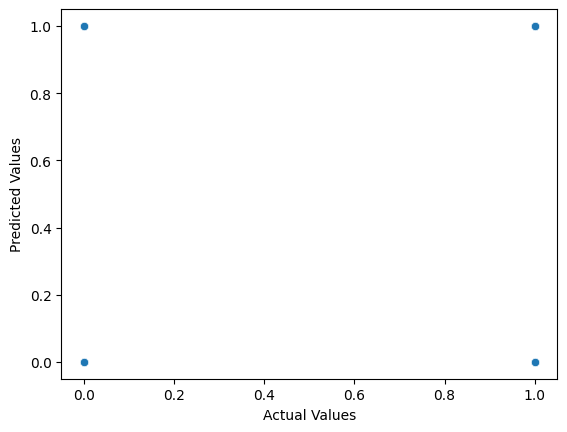

In [75]:
seaborn.scatterplot(data = tempDF, x = 'Actual Values', y = 'Predicted Values')
mplot.show()